In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
os.chdir('BIG5')

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'big5data.csv',
 'codebook.txt',
 'data.csv',
 'df_cleaned.csv',
 'Untitled.ipynb']

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df= pd.read_csv("big5data.csv")

In [8]:
df.shape

(19719, 57)

In [9]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3


## Fixing inaccurate age inputs
* Some participants put their age as greater than 100
* Some participants put their YOB instead of age

In [10]:
#get ages where participants entered greater than 100
age_100_greater = df.loc[df['age'] > 100,'age']

In [11]:
print('Number of partcipants that inputed wrong age:',age_100_greater.shape[0])

Number of partcipants that inputed wrong age: 83


In [12]:
#find array where age starts with 19, maybe participants put year of birth not age
#subtract year of birth from date of study (2012)
np.where(age_100_greater.astype('str').str.startswith('19'),2012-age_100_greater, age_100_greater)

array([       15,        17,        18,        15,        18,        18,
              20,        24,        22,        13,        15,        20,
              18,        23,        15,        28,        18, 999999999,
              19,        20,        18,       208,        16,        16,
              30,        17,        21,        14,        20,        17,
              51,        23,        23,        26,        36,        19,
          412434,        26,        21,        35,      2000,        17,
              44,        30,        19,        38,       223,        27,
             211,        16,        18,        16,        19,        20,
              20,        22,        20,        21,       266,        30,
              14,       188,        23,        23,        36,      1821,
             188,        16,        30,        17,        16,        18,
              27,        22,        20,        28,        20,        16,
              14,        48,        19,       118, 

In [13]:
#where age is greater than 100 and starts with 19,replace with 2012 - year of birth,else leave it
df.iloc[age_100_greater.index,1] =\
np.where(age_100_greater.astype('str').str.startswith('19'),2012-age_100_greater, age_100_greater)

In [14]:
#now we have only a few rows with inconsistent age values
df[df['age'] > 100].sort_values(by='age');

In [15]:
#for the rest of the values replace with the median age
df['age'] = np.where(df['age'] > 100,df['age'].median(),df['age'])

In [16]:
#no more ages greater than 100
df.loc[df['age']>100,'age'].any()

False

## Fixing incorrect personality trait answers
* some partcipants put the same values to the questionnaire
* remove the records where participants put wrong answers to questionnaire

In [17]:
#some partcipants put the same values to the questionnaire
df[df['age'] > 90]

,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
8223,4,92.0,1,1,3,5,IN,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8849,13,100.0,2,3,3,5,US,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
11468,10,97.0,2,2,2,1,US,3,3,5,5,3,3,3,3,3,3,3,3,5,5,3,3,3,3,3,3,3,3,5,5,3,3,3,3,3,3,3,3,5,5,3,3,3,3,3,3,3,3,5,5,3,3,3,3,3,3
14145,1,99.0,1,3,1,1,US,3,2,4,2,5,1,3,4,3,2,4,4,4,1,4,4,2,2,4,4,1,4,4,5,1,5,1,5,5,4,4,2,5,3,5,1,4,1,4,5,4,1,5,1,5,1,5,5,5,5


In [18]:
#find the records where participants put the same values for each answer
wrong_answers = df[df.iloc[:,7:].apply(pd.Series.nunique,axis= 1) == 1]

In [19]:
expected = df.shape[0] - wrong_answers.shape[0]
print("New dataframe should have", expected,"records after dropping the wrong answers")

New dataframe should have 19692 records after dropping the wrong answers


In [20]:
#drop wrong_answers
df.drop(index = wrong_answers.index,inplace = True)

In [21]:
#make sure it worked
assert expected == df.shape[0]

### Reading the "CODEBOOK"
* Displays the numeric code and its respective values

In [22]:
f = open("codebook.txt", "r")
print(f.read())
f.close()

This data was collected (c. 2012) through on interactive online personality test. Participants were informed that their responses would be recorded and used for research at the begining of the test and asked to confirm their consent at the end of the test.

The following items were rated on a five point scale where 1=Disagree, 3=Neutral, 5=Agree (0=missed). All were presented on one page in the order E1, N2, A1, C1, O1, E2...... 

E1	I am the life of the party.
E2	I don't talk a lot.
E3	I feel comfortable around people.
E4	I keep in the background.
E5	I start conversations.
E6	I have little to say.
E7	I talk to a lot of different people at parties.
E8	I don't like to draw attention to myself.
E9	I don't mind being the center of attention.
E10	I am quiet around strangers.
N1	I get stressed out easily.
N2	I am relaxed most of the time.
N3	I worry about things.
N4	I seldom feel blue.
N5	I am easily disturbed.
N6	I get upset easily.
N7	I change my mood a lot.
N8	I have frequent mood swings

### Create a new dataframe to map the values of races to respective string values

In [23]:
import re

In [24]:
races \
= '1=Mixed Race, 2=Arctic , 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other, 0=Unknown'

In [25]:
races

'1=Mixed Race, 2=Arctic , 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other, 0=Unknown'

In [26]:
race_splitted =re.split(', \d+=',races)

In [27]:
race_values = pd.DataFrame(race_splitted).reset_index(level =0)

In [28]:
race_values.rename(mapper ={'index':'level',0:'race'},axis = 1,inplace = True)

In [29]:
race_values.iloc[0,1] = 'Mixed Race'

In [30]:
race_values['level'] = np.where(race_values['level'] != 13,race_values['level']+1,0)

In [31]:
race_values

,level,race
0,1,Mixed Race
1,2,Arctic
2,3,Caucasian (European)
3,4,Caucasian (Indian)
4,5,Caucasian (Middle East)
5,6,"Caucasian (North African, Other)"
6,7,Indigenous Australian
7,8,Native American
8,9,"North East Asian (Mongol, Tibetan, Korean Japa..."
9,10,"Pacific (Polynesian, Micronesian, etc)"


### Calculate the big 5 personality   
https://openpsychometrics.org/printable/big-five-personality-test.pdf

In [32]:
df['Extroversion'] =\
20 + df.E1 - df.E2 + df.E3 - df.E4 + df.E5 - df.E6 + df.E7 - df.E8 + df.E9 - df.E10

df['Agreeableness'] =\
14 - df.A1 + df.A2 - df.A3 + df.A4 - df.A5 + df.A6 - df.A7 + df.A8 + df.A9 + df.A10

df['Conscientiousness'] =\
14 + df.C1 - df.C2 + df.C3 - df.C4 + df.C5 - df.C6 + df.C7 - df.C8 + df.C9 + df.C10

df['Neuroticism'] =\
38 - df.N1 + df.N2 - df.N3 + df.N4 - df.N5 - df.N6 - df.N7 - df.N8 - df.N9 - df.N10

df['Open2Experience'] =\
8 +  df.O1 - df.O2 + df.O3 - df.O4 + df.O5 - df.O6 + df.O7 + df.O8 + df.O9 + df.O10

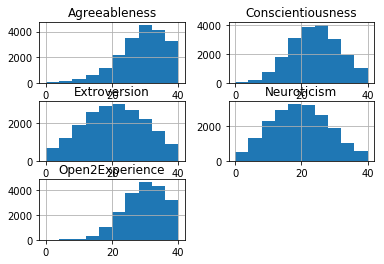

In [33]:
df[df.columns[-5:]].hist();

### Dealing with missing values  
* First drop null values, only 9 in the country column
* According to the code chart values that are equal to 0 means that the participant missed the question

In [34]:
#only country column has missing values (9), leave for now and drop later
df.isnull().sum();

In [35]:
#according to the codebook, 0 means that values are missing
(df.iloc[:,0:6] == 0).sum()

race      153
age         0
engnat     69
gender     24
hand       99
source      0
dtype: int64

In [36]:
#replace all the 0 in the race, age, engnant,gender, hand,source column to np.NaN
df.iloc[:,0:6] = np.where(df.iloc[:,0:6]==0,np.NaN,df.iloc[:,0:6])

In [37]:
#drop all Null values
df.dropna(inplace = True)
#reset dataframe
df.reset_index(drop = True,inplace = True)

In [38]:
#no null values
df.isnull().any().any()

False

### Changing the format of the encodings
* For categorical variables where no ordinal relationship exists, the integer coding may be misleading.
* Turn the encodings from a long to wide format

In [39]:
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10', 'Extroversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Open2Experience'],
      dtype='object')

**1 )** Merge the race_values and df together to map level to race

In [40]:
df = df.merge(race_values,how='left', left_on='race',right_on='level',copy= False)

In [41]:
#drop the duplicates/numerical code because we have the string form of race
df.drop('level',axis=1,inplace = True)

**2 )** Change value of engnat  
* Response to "is English your native language?". 1=yes, 2=no

In [42]:
df['engnat'] = np.where(df['engnat'] == 1, True, False)

**3 )** Change gender 
* Chosen from a drop down menu. 1=Male, 2=Female, 3=Other

In [43]:
gendervalues = {1:'Male',2:'Female',3:'Other'}

In [44]:
df['gender'] = df['gender'].map(gendervalues)

**4 )** Change hand
* "What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)

In [45]:
handvalues = {1:'Right',2:'Left',3:'Both'}
df['hand'] = df['hand'].map(handvalues)

**5 )** Source
* How the participant came to the test. Based on HTTP Referer. 1=from another page on the test website, 2=from google, 3=from facebook, 4=from any url with ".edu" in its domain name (e.g. xxx.edu, xxx.edu.au), 6=other source, or HTTP Referer not provided.

In [46]:
#Typo in the codebook, 6 should be 5
df['source'].value_counts()

1.0    11881
2.0     3577
5.0     3460
3.0      298
4.0      135
Name: source, dtype: int64

In [47]:
sourcevalues = {1:"AnotherPageFromTestPage",2:"Google",3:"Facebook",4:"Edu_Domain",5:"Other"}
df['source'] = df['source'].map(sourcevalues)

In [48]:
df.head()

,race_x,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,Extroversion,Agreeableness,Conscientiousness,Neuroticism,Open2Experience,race_y
0,3.0,53.0,True,Male,Right,AnotherPageFromTestPage,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,34,36,37,39,33,Caucasian (European)
1,13.0,46.0,True,Female,Right,AnotherPageFromTestPage,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,12,25,32,19,16,Other
2,1.0,14.0,False,Female,Right,AnotherPageFromTestPage,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,25,28,39,4,35,Mixed Race
3,3.0,19.0,False,Female,Right,AnotherPageFromTestPage,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,12,27,16,7,31,Caucasian (European)
4,11.0,25.0,False,Female,Right,Google,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,24,34,24,20,24,"South East Asian (Chinese, Thai, Malay, Filipi..."


## Changing age values from continuous to discrete

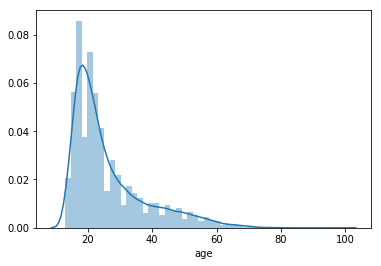

In [49]:
sns.distplot(df['age']);

In [50]:
df['age'].describe()

count    19351.000000
mean        26.205571
std         11.493529
min         13.000000
25%         18.000000
50%         22.000000
75%         31.000000
max         99.000000
Name: age, dtype: float64

In [51]:
bins = [0,17,25,39,np.inf]
labels = ['minor(<18)','ya(18-24)','adult(25-39)','oa(40+)']

In [52]:
df['age_bin'] = pd.cut(df['age'],bins=bins,labels=labels)

In [53]:
df['age_bin'].value_counts()

ya(18-24)       8406
adult(25-39)    4314
minor(<18)      3911
oa(40+)         2720
Name: age_bin, dtype: int64

## Create new column fromUS
* Create a new column where a person is True from the US or False not from US

In [54]:
#44% of participants came from the us
df['country'].value_counts(normalize= True);

In [55]:
df['fromUS'] = np.where(df['country']!='US',False,True)

## Binning race column to smaller bins

In [56]:
df['race_y'].value_counts()

Caucasian (European)                                        10421
Other                                                        2514
South East Asian (Chinese, Thai, Malay, Filipino, etc)       1847
Caucasian (Indian)                                           1504
Mixed Race                                                   1424
Caucasian (Middle East)                                       508
Caucasian (North African, Other)                              395
West African, Bushmen, Ethiopian                              256
Native American                                               197
North East Asian (Mongol, Tibetan, Korean Japanese, etc)      187
Pacific (Polynesian, Micronesian, etc)                         63
Indigenous Australian                                          22
Arctic                                                         13
Name: race_y, dtype: int64

In [57]:
#first strip the race_y column with any leading or trailing spaces
df['race_y'] = df['race_y'].str.strip()

In [58]:
asian = ["South East Asian (Chinese, Thai, Malay, Filipino, etc)",\
 "North East Asian (Mongol, Tibetan, Korean Japanese, etc)",\
 "Caucasian (Indian)"]
df.replace(asian,'Asian',inplace = True)

In [59]:
other = ['Caucasian (Middle East)','Caucasian (North African, Other)','West African, Bushmen, Ethiopian',\
        'Native American','Pacific (Polynesian, Micronesian, etc)','Indigenous Australian','Arctic']
df.replace(other,'Other',inplace = True)

In [60]:
df.replace('Caucasian (European)','European',inplace = True)

In [61]:
df['race_y'].value_counts()

European      10421
Other          3968
Asian          3538
Mixed Race     1424
Name: race_y, dtype: int64

In [62]:
#convert the pandas object to csv file
df.to_csv('df_cleaned.csv',index=False)